In [1]:
import requests
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from pycountry_convert import convert_country_alpha2_to_continent, convert_country_name_to_country_alpha2
pd.options.mode.chained_assignment = None

## `Question #1`

In [2]:
URL = 'https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt'
r = requests.get(URL).json()['data']
df = pd.DataFrame(r)

`For each university, we found the number of faculty members, students and international students.
We've used need the URLs of the respective universities.`

In [3]:
df_top_universities = df[['country','rank_display', 'region','title']][:200]

suffixes = np.array(df['url'])
urls = []
for suffix in suffixes:
    urls.append('https://www.topuniversities.com' + suffix + '#wurs')

def find_number(soup, tag, my_class):
    try:
        soup.find(tag, class_= my_class).find(tag, class_='number') 
    except: 
        return 0

    return int(soup.find(tag, class_= my_class).find(tag, class_='number')\
               .text.strip('\n').replace(',','').strip(' '))

staff = []
int_staff = []
students = []
intl_students = []
i = 1

for url in urls[:200]:
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
   
    faculty_staff = find_number(soup,'div','faculty-main wrapper col-md-4')
    intl_faculty_staff = find_number(soup, 'div', 'inter faculty')
    students_ = find_number(soup, 'div', 'students-main wrapper col-md-4')
    int_students = find_number(soup, 'div','int-students-main wrapper col-md-4')
    
    staff.append(faculty_staff)
    int_staff.append(intl_faculty_staff)
    students.append(students_)
    intl_students.append(int_students)
    
df_top_universities['students'] = pd.Series(students)
df_top_universities['inter_students'] = pd.Series(intl_students)
df_top_universities['staff'] = pd.Series(staff)
df_top_universities['inter_staff'] = pd.Series(int_staff)

df_top_universities['student_staff_ratio'] = df_top_universities.students\
                                             .divide(df_top_universities.staff).round(3)
df_top_universities['international_students_ratio'] = df_top_universities.inter_students\
                                                      .divide(df_top_universities.students).round(3)*100

df_top_universities.head()

,country,rank_display,region,title,students,inter_students,staff,inter_staff,student_staff_ratio,international_students_ratio
0,United States,1,North America,Massachusetts Institute of Technology (MIT),11067,3717,2982,1679,3.711,33.6
1,United States,2,North America,Stanford University,15878,3611,4285,2042,3.705,22.7
2,United States,3,North America,Harvard University,22429,5266,4350,1311,5.156,23.5
3,United States,4,North America,California Institute of Technology (Caltech),2255,647,953,350,2.366,28.7
4,United Kingdom,5,Europe,University of Cambridge,18770,6699,5490,2278,3.419,35.7


### `(a) Ratio between faculty members and students`

In [4]:
df_top_universities = df_top_universities.sort_values(['student_staff_ratio'], ascending = True)
df_top_universities[['title','student_staff_ratio']].head()

,title,student_staff_ratio
3,California Institute of Technology (Caltech),2.366
15,Yale University,2.511
5,University of Oxford,2.921
4,University of Cambridge,3.419
16,Johns Hopkins University,3.619


### `(b) Ratio of international students`

In [5]:
df_top_universities = df_top_universities.sort_values(['international_students_ratio'], ascending=False)
df_top_universities[['title','international_students_ratio']].head()

,title,international_students_ratio
34,London School of Economics and Political Scien...,69.1
11,Ecole Polytechnique Fédérale de Lausanne (EPFL),57.0
7,Imperial College London,54.4
198,Maastricht University,50.3
47,Carnegie Mellon University,47.8


### `(c)(1) Ratio between faculty members and students by country`

In [6]:
df_staff = df_top_universities.copy()
df_staff = df_staff.groupby('country').mean()
df_staff = df_staff.sort_values(['student_staff_ratio'])
df_staff[['student_staff_ratio']].round(3).head()

,student_staff_ratio
country,
Russia,4.506
Saudi Arabia,5.687
Singapore,6.172
Malaysia,6.498
Japan,6.566


### `(c)(2) Ratio of international students by country`

In [7]:
df_inter = df_top_universities.copy()
df_inter = df_inter.groupby('country').mean()
df_inter = df_inter.sort_values(['international_students_ratio'], ascending=False)
df_inter[['international_students_ratio']].round(3).head()

,international_students_ratio
country,
United Kingdom,35.132
Australia,34.678
Switzerland,31.371
Hong Kong,31.200
Austria,30.600


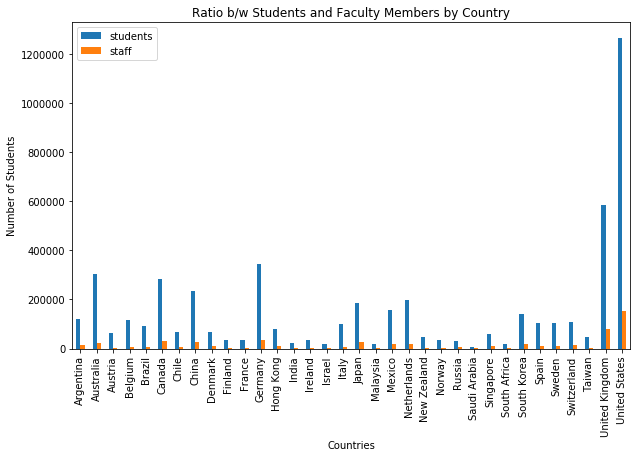

In [8]:
df_plot = df_top_universities.copy()
df_plot = df_plot.groupby('country').sum()
df_plot[['students','staff']]\
    .plot.bar(figsize=(10,6),title ='Ratio b/w Students and Faculty Members by Country')
plt.xlabel('Countries')
plt.ylabel('Number of Students')
plt.show()

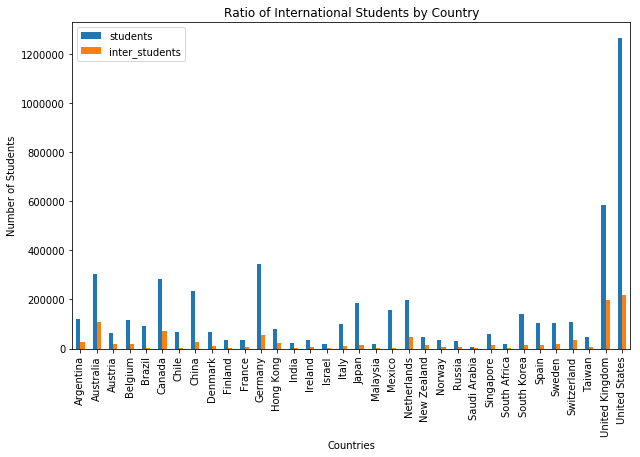

In [9]:
df_plot = df_top_universities.copy()
df_plot = df_plot.groupby('country').sum()
df_plot[['students','inter_students']]\
    .plot.bar(figsize=(10,6),title ='Ratio of International Students by Country')
plt.xlabel('Countries')
plt.ylabel('Number of Students')
plt.show()

### `(d)(1) Ratio between faculty members and students by region`

In [10]:
df_staff = df_top_universities.copy()
df_staff = df_staff.groupby('region').mean()
df_staff = df_staff.sort_values(['student_staff_ratio'])
df_staff[['student_staff_ratio']].round(3)

,student_staff_ratio
region,
Asia,7.978
North America,9.214
Europe,9.874
Latin America,11.235
Africa,11.306
Oceania,13.795


### `(d)(2) Ratio of international students by region`

In [11]:
df_inter = df_top_universities.copy()
df_inter = df_inter.groupby('region').mean()
df_inter = df_inter.sort_values(['international_students_ratio'], ascending=False)
df_inter[['international_students_ratio']].round(3)

,international_students_ratio
region,
Oceania,32.900
Europe,24.592
North America,20.242
Africa,17.000
Asia,13.239
Latin America,7.186


`Plots & Analysis`

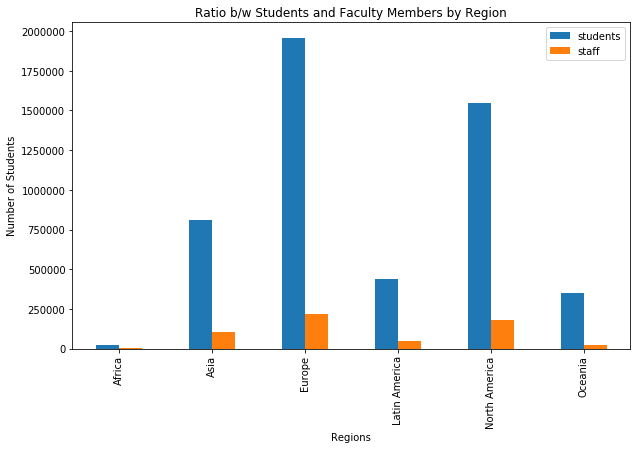

In [12]:
df_plot = df_top_universities.copy()
df_plot = df_plot.groupby('region').sum()
df_plot[['students','staff']]\
    .plot.bar(figsize=(10,6),title ='Ratio b/w Students and Faculty Members by Region')
plt.xlabel('Regions')
plt.ylabel('Number of Students')
plt.show()

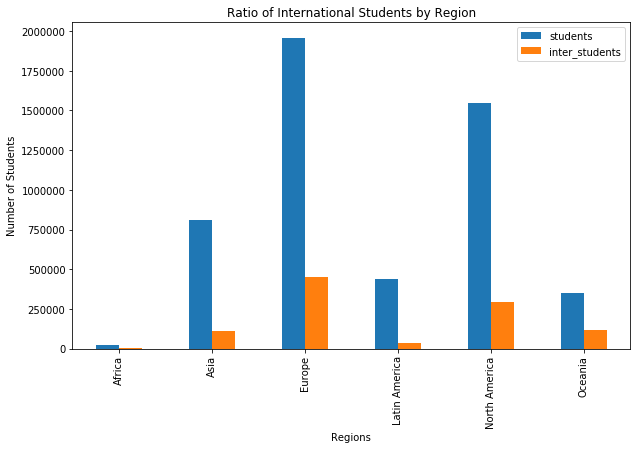

In [13]:
df_plot = df_top_universities.copy()
df_plot = df_plot.groupby('region').sum()
df_plot[['students','inter_students']]\
    .plot.bar(figsize=(10,6),title ='Ratio of International Students by Region')
plt.xlabel('Regions')
plt.ylabel('Number of Students')
plt.show()

## `Question #2`

In [14]:
URL = 'https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'
r = requests.get(URL).json()['data']
df = pd.DataFrame(r)

`Regions are not provided in timeshighereducation.com.
We converted countries to continents using an external library.`

In [15]:
df_times_higher = df[['location','rank_order','name', 'stats_number_students', 'stats_pc_intl_students',
             'stats_student_staff_ratio']][:200]

def convert_country_name_to_continent(name):    
    alpha2 = convert_country_name_to_country_alpha2(name)
    return convert_country_alpha2_to_continent(alpha2)

df_times_higher = df_times_higher.copy()
df_times_higher['continent'] = df_times_higher\
                                .apply(lambda x: convert_country_name_to_continent(x['location']), axis=1)

df_times_higher.head()

,location,rank_order,name,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,continent
0,United Kingdom,10,University of Oxford,"20,409",38%,11.2,Europe
1,United Kingdom,20,University of Cambridge,"18,389",35%,10.9,Europe
2,United States,30,California Institute of Technology,"2,209",27%,6.5,North America
3,United States,40,Stanford University,"15,845",22%,7.5,North America
4,United States,50,Massachusetts Institute of Technology,"11,177",34%,8.7,North America


`Derive missing fields from existing ones:
inter_students = stats_number_students * stats_pc_intl_students / 100
staff = stats_number_students / stats_student_staff_ratio
`

In [16]:
df_times_higher['stats_student_staff_ratio'] = df_times_higher.stats_student_staff_ratio.astype('float')

df_times_higher['stats_number_students'] = df_times_higher['stats_number_students']\
    .replace(',', '',regex=True).astype('float')
    
df_times_higher['stats_pc_intl_students'] = df_times_higher['stats_pc_intl_students']\
    .replace('%','',regex=True).astype('float')

df_times_higher['inter_students'] = df_times_higher\
    .apply(lambda x: int(x['stats_number_students']*x['stats_pc_intl_students']/100), axis=1)

df_times_higher['staff'] = df_times_higher\
    .apply(lambda x: int(x['stats_number_students']/x['stats_student_staff_ratio']), axis=1)

In [17]:
df_times_higher.head()

,location,rank_order,name,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,continent,inter_students,staff
0,United Kingdom,10,University of Oxford,20409.0,38.0,11.2,Europe,7755,1822
1,United Kingdom,20,University of Cambridge,18389.0,35.0,10.9,Europe,6436,1687
2,United States,30,California Institute of Technology,2209.0,27.0,6.5,North America,596,339
3,United States,40,Stanford University,15845.0,22.0,7.5,North America,3485,2112
4,United States,50,Massachusetts Institute of Technology,11177.0,34.0,8.7,North America,3800,1284


### `(a) Ratio between faculty members and students`

In [18]:
df_times_higher = df_times_higher.sort_values(['stats_student_staff_ratio'], ascending = True)
df_times_higher[['name', 'stats_student_staff_ratio']].head()

,name,stats_student_staff_ratio
105,Vanderbilt University,3.3
109,University of Copenhagen,4.1
12,Johns Hopkins University,4.3
11,Yale University,4.3
153,University of Rochester,4.3


### `(b) Ratio of international students`

In [19]:
df_times_higher.sort_values(['stats_pc_intl_students'], ascending=False, inplace=True)
df_times_higher[['name', 'stats_pc_intl_students']].head()

,name,stats_pc_intl_students
24,London School of Economics and Political Science,71.0
178,University of Luxembourg,57.0
37,École Polytechnique Fédérale de Lausanne,55.0
7,Imperial College London,55.0
102,Maastricht University,50.0


`Some universities such as University of Luxembourg that are in the top 200 list in topuniversities.com are not in the list according to topuniversities.com and that is why ordering is different.`

### `(c)(1) Ratio between faculty members and students by country`

In [20]:
df_staff = df_times_higher.copy()
df_staff = df_staff.groupby('location').mean()
df_staff = df_staff.sort_values(['stats_student_staff_ratio'])
df_staff[['stats_student_staff_ratio']].round(2).head()

,stats_student_staff_ratio
location,
Russian Federation,7.30
Japan,7.70
Denmark,8.13
Italy,8.45
Taiwan,11.50


### `(c)(2) Ratio of international students by country`

In [21]:
df_inter = df_times_higher.copy()
df_inter = df_inter.groupby('location').mean()
df_inter = df_inter.sort_values(['stats_pc_intl_students'], ascending=False)
df_inter[['stats_pc_intl_students']].round(3).head()

,stats_pc_intl_students
location,
Luxembourg,57.000
United Kingdom,36.548
Hong Kong,32.800
Switzerland,31.429
Australia,30.750


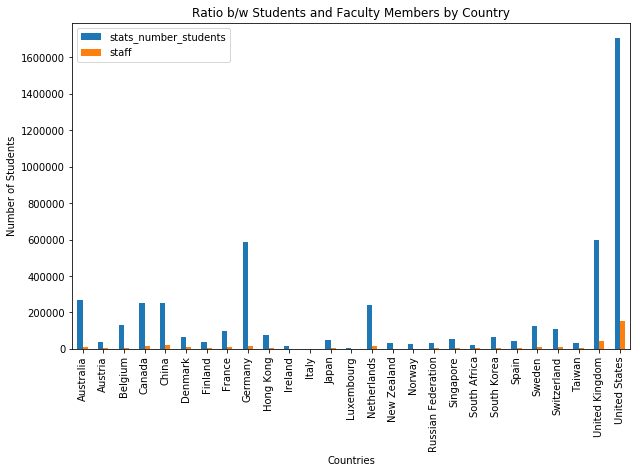

In [22]:
df_plot = df_times_higher.copy()
df_plot = df_plot.groupby('location').sum()
df_plot[['stats_number_students','staff']]\
    .plot.bar(figsize=(10,6),title ='Ratio b/w Students and Faculty Members by Country')
plt.xlabel('Countries')
plt.ylabel('Number of Students')
plt.show()

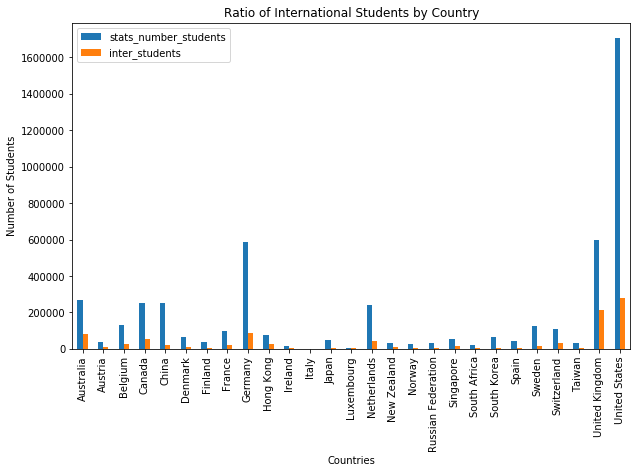

In [23]:
df_plot = df_times_higher.copy()
df_plot = df_plot.groupby('location').sum()
df_plot[['stats_number_students','inter_students']]\
    .plot.bar(figsize=(10,6),title ='Ratio of International Students by Country')
plt.xlabel('Countries')
plt.ylabel('Number of Students')
plt.show()

### `(d)(1) Ratio between faculty members and students by region`

In [24]:
df_copy = df_times_higher.groupby('continent').mean()
df_copy = df_copy.sort_values(['stats_student_staff_ratio'])
df_copy[['stats_student_staff_ratio']].round(3).head()

,stats_student_staff_ratio
continent,
Africa,11.700
North America,12.594
Asia,13.976
Europe,21.371
Oceania,26.500


`[Comment Required]`

### `(d)(2) Ratio of international students by region`

In [25]:
df_copy = df_times_higher.groupby('continent').mean()
df_copy = df_copy.sort_values(['stats_pc_intl_students'], ascending=False)
df_copy['stats_pc_intl_students'] = df_copy['stats_pc_intl_students'].round(3)
df_copy[['stats_pc_intl_students']]

,stats_pc_intl_students
continent,
Oceania,30.556
Europe,24.465
North America,18.559
Africa,18.000
Asia,16.524


`This ordering is similar to what've found earlier.
Only difference is that there is no university from Latin America at top 200 accordig to timeshighereducation.com.`

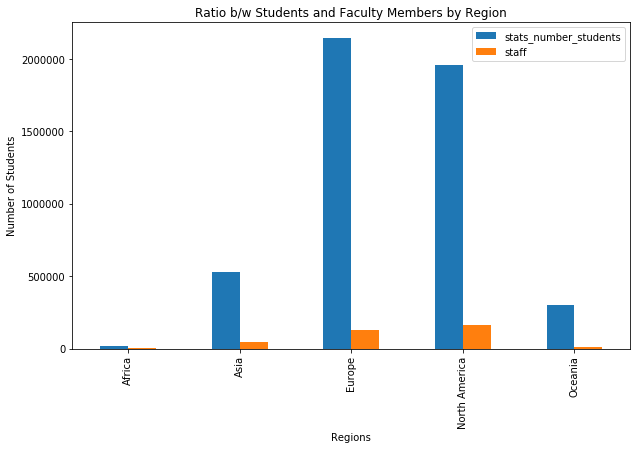

In [26]:
df_plot = df_times_higher.copy()
df_plot = df_plot.groupby('continent').sum()
df_plot[['stats_number_students','staff']]\
    .plot.bar(figsize=(10,6),title ='Ratio b/w Students and Faculty Members by Region')
plt.xlabel('Regions')
plt.ylabel('Number of Students')
plt.show()

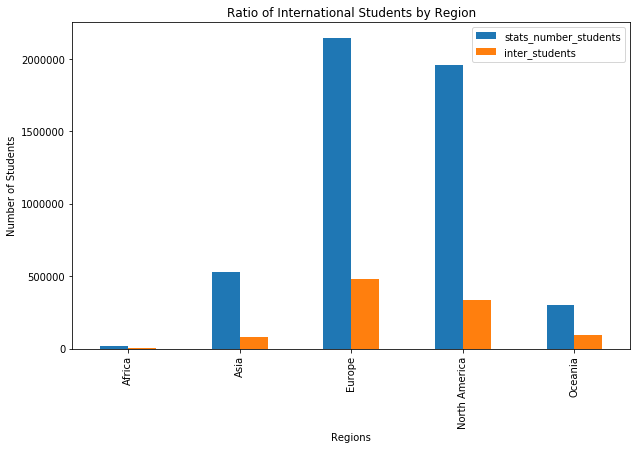

In [27]:
df_plot = df_times_higher.copy()
df_plot = df_plot.groupby('continent').sum()
df_plot[['stats_number_students','inter_students']]\
    .plot.bar(figsize=(10,6),title ='Ratio of International Students by Region')
plt.xlabel('Regions')
plt.ylabel('Number of Students')
plt.show()

## `Question #3`

`The goal of this exercise is to merge the 2 dataframe on the university names.
The issue is that many university don't have the exact same name in both ranking.
The strategy of this algorithm is to have at least 2 common key words in the 2 universities to match them.
An other issue with that strategy is that a lot of university that does not correspond would match.
A basic exemple of that would be 'Hong Kong University of Science and Technology' and 'Massachusset Institute of Technology'
Have both 2 common words : 'of' and 'Technology'
To fix this problem, some special words like 'of', 'College', 'de', etc. are removed from the university name.
Finally every university of the first ranking is compared to each university of the second. 
If a match is found, the university name of the first ranking is overwritten with the name of the second ranking.
At the end the university are merged by name.
There are a few special case that have to be treated manually with this strategy.
The flaw of this strategy is that we loose the exact university names. 
(ex: Massachusset Institute of Technology becomes Massachusset Technology)
`

In [28]:
# just cleaning up column names and types
df_top_universities.columns = ['country', 'rank', 'region', 'title', 'students', 'inter_students', 'staff',\
                                   'inter_staff', 'student_staff_ratio', 'international_student_ratio']

df_times_higher.columns = ['country', 'rank', 'title', 'students', 'international_student_ratio',\
                               'student_staff_ratio','region', 'inter_students', 'staff']

df_times_higher['rank'] = df_times_higher.apply(lambda x: int(x['rank'])/10., axis=1)
df_top_universities['rank'] = df_top_universities['rank'].replace('=','',regex=True).astype('int')
df_times_higher['international_student_ratio'] = df_times_higher.international_student_ratio.astype("int")

# Copy dataframes for convenience and obtain relevant columns for analysis
df_TU = df_top_universities[['rank', 'title', 'students', 'inter_students', 'staff',\
                                   'student_staff_ratio', 'international_student_ratio']].copy()
df_THE = df_times_higher[['rank', 'title', 'students', 'inter_students', 'staff',\
                                   'student_staff_ratio', 'international_student_ratio']].copy()

In [29]:
# function to return the number of common words in the 2 strings
def nb_common_string(string1, string2):  
    list1=string1.split()
    list2=string2.split()
    return len(set(list1).intersection(list2))

# treat university names to have 2 unique word for each corresponding university in each ranking
def treat_university(uni):
    
    # avoid confustion like 'University of Pennsylvania' and 'Pensilvania state University'
    if('State' in uni.split()):
        uni=uni.replace('University', '')   
    uni=uni.replace('- ','')
    uni=uni.replace(',','')
    uni=uni.replace('(','')
    uni=uni.replace(')','')
    uni=uni.replace('of ','')
    uni=uni.replace('Swiss ','')
    uni=uni.replace('Hong Kong','Hong_Kong') # Count Hong Kong as 1 word
    uni=uni.replace('The ','')
    uni=uni.replace('Federal ','')
    uni=uni.replace('\'','')
    uni=uni.replace('’','')
    uni=uni.replace('and ','')
    uni=uni.replace('&','')
    uni=uni.replace('École', 'Ecole')
    uni=uni.replace('Ludwig-Maximilians-Universität München', 'LMU Munich')
    uni=uni.replace('Ruprecht-Karls-Universität Heidelberg', 'Heidelberg University')   
    
    # don't remove University for case of type "University of ..." and "University ... College ..."
    if len(uni.split())>2 and ('College' not in uni.split()): 
       uni=uni.replace('University','')
    
    # allow to have 2 words in common in second ranking (Massachusset Institute of Technology)
    if('Institute' not in uni.split()): 
        uni=uni.replace('Technology','')
    uni=uni.replace('Institute ','')
    if('Hong_Kong' in uni.split()): 
        uni=uni.replace('University','')       
    uni=uni.replace('College ','')
    uni=uni.replace('de ','')
    
    # special case of "Ecole Polytechnique" to not confuse with "Ecole Polytechnique Federal de Lausanne"
    if(uni=="Ecole Polytechnique"): 
        uni="École Polytechnique Paris"
        
    return uni

# return list1 that contain the exact same university names as list2
def rename_list1_as_list2(list1, list2, nb_common_str):   
    for elem1 in list1:
        for elem2 in list2:
            if nb_common_string(elem1, elem2) >= nb_common_str:
                list1[list1.index(elem1)]=list2[list2.index(elem2)]
                break
    return list1

In [31]:
# treat university names in the ranking to match them
df_TU['title'] = pd.Series(list(map(lambda x: treat_university(x), df_TU['title'].tolist())))
df_THE['title'] = pd.Series(list(map(lambda x: treat_university(x), df_THE['title'].tolist())))

# modify the university names of rank one to make them correspond to rank 2
df_TU['title'] = pd.Series(rename_list1_as_list2(df_TU['title'].tolist(), df_THE['title'].tolist(), 2))

# merge dataframes
mergedRanking = pd.merge(df_TU, df_THE, on='title', how='outer') 
mergedRanking.head()

,rank_x,title,students_x,inter_students_x,staff_x,student_staff_ratio_x,international_student_ratio_x,rank_y,students_y,inter_students_y,staff_y,student_staff_ratio_y,international_student_ratio_y
0,35.0,Kyoto University,9760.0,6748.0,1088.0,8.971,69.1,189.0,37288.0,2237.0,3007.0,12.4,6.0
1,12.0,Cape Town,10343.0,5896.0,1695.0,6.102,57.0,108.0,41017.0,9023.0,1872.0,21.9,22.0
2,8.0,CentraleSupélec,16090.0,8746.0,3930.0,4.094,54.4,NaN,NaN,NaN,NaN,NaN,NaN
3,200.0,Seoul National,16385.0,8234.0,1277.0,12.831,50.3,168.0,15703.0,942.0,1033.0,15.2,6.0
4,47.0,Kings London,13356.0,6385.0,1342.0,9.952,47.8,11.0,20361.0,4072.0,3132.0,6.5,20.0


## `Question #4`

In [32]:
mergedRanking.corr(method='pearson', min_periods=1)

,rank_x,students_x,inter_students_x,staff_x,student_staff_ratio_x,international_student_ratio_x,rank_y,students_y,inter_students_y,staff_y,student_staff_ratio_y,international_student_ratio_y
rank_x,1.000000,-0.033233,-0.302350,-0.308171,0.373101,-0.369101,0.321273,-0.028267,-0.116382,-0.079513,0.037739,-0.111126
students_x,-0.033233,1.000000,0.562818,0.767160,0.331211,-0.171074,-0.071117,0.037667,0.085875,0.027355,-0.067884,0.126649
inter_students_x,-0.302350,0.562818,1.000000,0.476709,0.196063,0.539893,-0.102327,-0.009141,0.082262,0.034204,-0.081105,0.065693
staff_x,-0.308171,0.767160,0.476709,1.000000,-0.266907,-0.069602,-0.177571,0.051831,0.152626,0.031371,-0.055092,0.152059
student_staff_ratio_x,0.373101,0.331211,0.196063,-0.266907,1.000000,-0.103964,0.146472,-0.098274,-0.148306,-0.032666,-0.070005,-0.036778
international_student_ratio_x,-0.369101,-0.171074,0.539893,-0.069602,-0.103964,1.000000,-0.059700,0.096938,0.069093,0.107120,-0.077321,-0.068713
rank_y,0.321273,-0.071117,-0.102327,-0.177571,0.146472,-0.059700,1.000000,-0.154816,-0.328920,-0.249715,0.105237,-0.203950
students_y,-0.028267,0.037667,-0.009141,0.051831,-0.098274,0.096938,-0.154816,1.000000,0.577516,0.570483,0.258414,-0.298455
inter_students_y,-0.116382,0.085875,0.082262,0.152626,-0.148306,0.069093,-0.328920,0.577516,1.000000,0.275928,0.138398,0.489935
staff_y,-0.079513,0.027355,0.034204,0.031371,-0.032666,0.107120,-0.249715,0.570483,0.275928,1.000000,-0.428915,-0.223396


`[Comment Required]`

## `Question #5`

`First, we change column names and types for two dataframes to allign before joining.`

In [33]:
df_THE =\
df_times_higher[['country', 'region', 'rank', 'title', 'student_staff_ratio', 'international_student_ratio']]

df_THE.head()

,country,region,rank,title,student_staff_ratio,international_student_ratio
24,United Kingdom,Europe,25.0,London School of Economics and Political Science,12.2,71
178,Luxembourg,Europe,179.0,University of Luxembourg,14.6,57
37,Switzerland,Europe,38.0,École Polytechnique Fédérale de Lausanne,11.2,55
7,United Kingdom,Europe,8.0,Imperial College London,11.4,55
102,Netherlands,Europe,103.0,Maastricht University,18.0,50


In [34]:
df_TU =\
df_top_universities[['country', 'region', 'rank', 'title', 'student_staff_ratio', 'international_student_ratio']]

df_TU.head()

,country,region,rank,title,student_staff_ratio,international_student_ratio
34,United Kingdom,Europe,35,London School of Economics and Political Scien...,8.971,69.1
11,Switzerland,Europe,12,Ecole Polytechnique Fédérale de Lausanne (EPFL),6.102,57.0
7,United Kingdom,Europe,8,Imperial College London,4.094,54.4
198,Netherlands,Europe,200,Maastricht University,12.831,50.3
47,United States,North America,47,Carnegie Mellon University,9.952,47.8


`We've used edit distance to detect same university names.`

In [35]:
def edit_distance_difference(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return (distances[-1] / float(len(s2)))*100

`By emprical analysis, we found there might be difference between the name of the same university as much as %25.
Which means that if "edit_distance_difference" value is smaller than %25, meaning that names are more than %75 similar to each other, there is a good chance that these two names are the same.
Consequently, we match university names whose "edit_distance_difference" is the smallest among the names whose "edit_distance_difference" is also smaller than %25.`

##### `Create refrence dictionary to convert names to each other`

In [41]:
names_TU = list(df_TU.title)
names_THE = list(df_THE.title)

name_reference = dict()
for name_first in names_TU:
    
    curr_diff = 25
    for name_second in names_THE:
        diff = edit_distance_difference(name_first, name_second)
        if diff < curr_diff and diff < 25:
            name_reference[name_first] = name_second
            curr_diff = diff

`There are 162 intersection out of 200 universities.`

##### `Convert university names in "df_TU"  using "name_reference" dictionary`

In [42]:
def convert_name(name, reference_dict):
    try:
        return reference_dict[name]
    except:
        return name
    
df_TU['title'] = df_TU.apply(lambda x: convert_name(x['title'], name_reference), axis=1)

##### `Join the tables by "name"`

In [43]:
df_merged = pd.merge(df_THE.iloc[:,2:], df_TU.iloc[:,2:], how='outer', on=['title']).fillna(0.)

`SSR: Student Staff Ratio
ISR: International Student Ratio`

`
The method we've used to create custom ranking is as follows.
I. Convert SSR values into corresponding descending values by using the following formula:
`

`
max = mean + 2 * standart_deviation
descending_ssr = ((max - ascending_ssr) / max) * 100
` 

`
Taking (mean + 2 * standart_deviation) as the max value seems more consistent than taking the real max value.
`

`
II. Avarage SSR and ISR values that are coming from two tables
III. Avarage SSR and ISR values together
`

`
 They are both out of 100 so, this calculation makes sense. 
`

In [44]:
max_ssr_x = df_merged['student_staff_ratio_x'].mean() + 2 * df_merged['student_staff_ratio_x'].std()
max_ssr_y = df_merged['student_staff_ratio_y'].mean() + 2 * df_merged['student_staff_ratio_y'].std()
def custom_score(ssr_x, isr_x, ssr_y, isr_y, max_ssr_x, max_ssr_y): 
    
    descending_ssr_x = ((max_ssr_x - ssr_x) / max_ssr_x) * 100
    descending_ssr_y = ((max_ssr_y - ssr_y) / max_ssr_y) * 100
    
    descending_ssr_mean = (descending_ssr_x + descending_ssr_y) / 2.
    isr_mean = (isr_x + isr_y) / 2.
    
    if not ssr_x:
        return (descending_ssr_y + isr_y) / 2
    elif not ssr_y:
        return (descending_ssr_x + isr_x) / 2
    else:
        return (descending_ssr_mean + isr_mean) / 2

df_merged['custom_score'] = df_merged\
    .apply(lambda x: custom_score(x['student_staff_ratio_x'], x['international_student_ratio_x'],x['student_staff_ratio_y'], x['international_student_ratio_y'],max_ssr_x,max_ssr_y).round(1), axis=1)
    

In [45]:
df_merged.sort_values(['custom_score'], ascending=False)\
    .set_index(pd.Series(list(range(1,df_merged.shape[0]+1))))[['title', 'custom_score']].head()

,title,custom_score
1,London School of Economics and Political Science,65.4
2,Imperial College London,64.8
3,École Polytechnique Fédérale de Lausanne,62.8
4,University College London,61.1
5,University of Luxembourg,60.5


`The trivial approach of finding the best university by taking in consideration both rankings can be just avaraging rankings from both websites.`

In [47]:
def avarage_score(rank_overall_x, rank_overall_y): 
    
    if not rank_overall_x:
        return rank_overall_y
    elif not rank_overall_y:
        return rank_overall_x
    else:
        return (rank_overall_x + rank_overall_y) / 2.

df_merged['avarage_score'] = df_merged\
    .apply(lambda x: avarage_score(x['rank_x'], x['rank_y']), axis=1)

In [48]:
df_merged.sort_values(['avarage_score'])\
    .set_index(pd.Series(list(range(1,df_merged.shape[0]+1))))[['title', 'avarage_score']].head()

,title,avarage_score
1,Stanford University,3.0
2,Massachusetts Institute of Technology,3.0
3,University of Oxford,3.5
4,California Institute of Technology,3.5
5,University of Cambridge,3.5
